<a href="https://colab.research.google.com/github/shuklahrs/Machine-Learning/blob/main/Upper_Confidence_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [44]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [45]:
import math
N = 10000
d = 10
adsSelected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for x in range(0, d):
        if (numbers_of_selections[x] > 0):
            average_reward = sums_of_rewards[x] / numbers_of_selections[x]
            delta_x = math.sqrt(3/2 * math.log(n + 1)/numbers_of_selections[x])
            upper_bound = average_reward + delta_x
        else:
                upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = x
    adsSelected.append(ad)
    numbers_of_selections[ad] += 1
    sums_of_rewards[ad] += dataset.values[n, ad]
    total_rewards += dataset.values[n, ad]
     

## Visualising the results

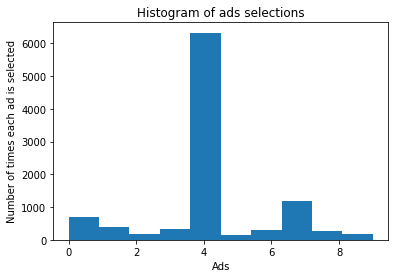

In [46]:
plt.hist(adsSelected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad is selected')
plt.show()